In [1]:
import pandas as pd
import networkx as nx

reviews = pd.read_csv('reviews.csv') # reading the extracted csv file
reviews.drop('Unnamed: 0', inplace = True, axis = 1) # dropping the unwanted columns
reviews

,review_id,user_id,business_id
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ
...,...,...,...
6990275,H0RIamZu0B0Ei0P4aeh3sQ,qskILQ3k0I_qcCMI-k6_QQ,jals67o91gcrD4DC81Vk6w
6990276,shTPgbgdwTHSuU67mGCmZQ,Zo0th2m8Ez4gLSbHftiQvg,2vLksaMmSEcGbjI5gywpZA
6990277,YNfNhgZlaaCO5Q_YJR4rEw,mm6E4FbCMwJmb7kPDZ5v2Q,R1khUUxidqfaJmcpmGd4aw
6990278,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA


In [2]:
business = pd.read_csv('business.csv')
business.drop('Unnamed: 0', inplace = True, axis = 1)
business

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,1,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas","{'Monday': '10:0-19:30', 'Tuesday': '10:0-19:3..."
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby...","{'Monday': '9:30-17:30', 'Tuesday': '9:30-17:3..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,39.908707,-86.065088,3.5,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut...",NaN
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,1,"{'BusinessParking': ""{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician...","{'Monday': '9:0-20:0', 'Tuesday': '9:0-20:0', ..."


In [3]:
df12=pd.merge(reviews, business, left_on='business_id', right_on='business_id')
df12

,review_id,user_id,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,Turning Point of North Wales,1460 Bethlehem Pike,North Wales,PA,19454,40.210196,-75.223639,3.0,169,1,"{'NoiseLevel': ""u'average'"", 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."
1,VJxlBnJmCDIy8DFG0kjSow,Iaee7y6zdSB3B-kRCo4z1w,XQfwVwDr-v0ZS3_CbbE5Xw,Turning Point of North Wales,1460 Bethlehem Pike,North Wales,PA,19454,40.210196,-75.223639,3.0,169,1,"{'NoiseLevel': ""u'average'"", 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."
2,S6pQZQocMB1WHMjTRbt77A,ejFxLGqQcWNLdNByJlIhnQ,XQfwVwDr-v0ZS3_CbbE5Xw,Turning Point of North Wales,1460 Bethlehem Pike,North Wales,PA,19454,40.210196,-75.223639,3.0,169,1,"{'NoiseLevel': ""u'average'"", 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."
3,WqgTKVqWVHDHjnjEsBvUgg,f7xa0p_1V9lx53iIGN5Sug,XQfwVwDr-v0ZS3_CbbE5Xw,Turning Point of North Wales,1460 Bethlehem Pike,North Wales,PA,19454,40.210196,-75.223639,3.0,169,1,"{'NoiseLevel': ""u'average'"", 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."
4,M0wzFFb7pefOPcxeRVbLag,dCooFVCk8M1nVaQqcfTL3Q,XQfwVwDr-v0ZS3_CbbE5Xw,Turning Point of North Wales,1460 Bethlehem Pike,North Wales,PA,19454,40.210196,-75.223639,3.0,169,1,"{'NoiseLevel': ""u'average'"", 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6990275,0gai4MzBzFCa7JsS31RRjg,xHu1jmrnv4DdJMuC8IxeRg,vI4vyi1dfG93oAiSRFDymA,Aesthetic Dermatology Associates,"21 Industrial Blvd, Ste 101",Paoli,PA,19301,40.045448,-75.501140,2.5,5,1,"{'BikeParking': 'True', 'WheelchairAccessible'...","Medical Spas, Doctors, Laser Hair Removal, Der...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-17:30..."
6990276,7MZu6bFdFoqr7MyPKqvoew,aYveEctPYcZiubXyEgLhTA,vI4vyi1dfG93oAiSRFDymA,Aesthetic Dermatology Associates,"21 Industrial Blvd, Ste 101",Paoli,PA,19301,40.045448,-75.501140,2.5,5,1,"{'BikeParking': 'True', 'WheelchairAccessible'...","Medical Spas, Doctors, Laser Hair Removal, Der...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-17:30..."
6990277,3emHuLQvuAw0l66TzSWmKA,oz-So7Kwo5tW51HrT-BgIg,vI4vyi1dfG93oAiSRFDymA,Aesthetic Dermatology Associates,"21 Industrial Blvd, Ste 101",Paoli,PA,19301,40.045448,-75.501140,2.5,5,1,"{'BikeParking': 'True', 'WheelchairAccessible'...","Medical Spas, Doctors, Laser Hair Removal, Der...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-17:30..."
6990278,T-adPwD-eP2LvuDINKOA9g,09zj3b4tM-xJjozvtk34wQ,vI4vyi1dfG93oAiSRFDymA,Aesthetic Dermatology Associates,"21 Industrial Blvd, Ste 101",Paoli,PA,19301,40.045448,-75.501140,2.5,5,1,"{'BikeParking': 'True', 'WheelchairAccessible'...","Medical Spas, Doctors, Laser Hair Removal, Der...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-17:30..."


In [4]:
#df12.to_csv('main.csv', index = False)

# this file is too large, so not included in the final submission

In [5]:
df12.state.unique()

array(['PA', 'AZ', 'LA', 'CA', 'FL', 'IN', 'MO', 'TN', 'NV', 'AB', 'NJ',
       'IL', 'ID', 'DE', 'HI', 'NC', 'CO', 'WA', 'UT', 'TX', 'MT', 'MI',
       'SD', 'XMS', 'MA', 'VI', 'VT'], dtype=object)

**From the dataframe taking Louisiana state**

In [6]:
df12_la = df12[df12['state'] == 'LA'] # louisiana state
df12_la.shape


(761673, 16)

In [7]:
df12_la.city.unique()

array(['New Orleans', 'Kenner', 'Metairie', 'Harvey', 'Gretna',
       'Chalmette', 'Harahan', 'Westwego', 'Bywater', 'Arabi',
       'Jefferson', 'Marrero', 'Belle Chasse', 'NEW ORLEANS', 'Avondale',
       'Bridge City', 'Terrytown', 'St.Rose', 'Belle Chase',
       'River Ridge', 'Elmwood', 'Meterie', 'Meraux', 'metairie',
       'Mandeville', 'Violet', 'Jefferson Parish', 'French Quarter',
       'Luling', 'Covington', 'Saint Rose', 'Waggaman', 'St Rose',
       'Saint Bernard', 'New orleans', 'Gentilly', 'St. Rose',
       'Riveridge', 'Downtown', 'Mississauga', 'New Orlaens', 'Bucktown',
       'Algiers', 'new orleans', 'Chalemette', 'Metarie', 'Metairie ',
       'elmwood', 'French Quarter - CBD', 'NEW ORLEANS AP', 'Boutte',
       'Slidell', 'kenner'], dtype=object)

- **Taking a single metropolitian area 'KENNER'**

In [8]:
la_city = df12_la[df12_la['city']=='Kenner']
la_city

,review_id,user_id,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
35842,JzBhoRVecH9pO0BBiJNQqw,Pbry-b9xBgHlWlbGlYbTZg,b7V_5q22_eTeHlYzq1bpFw,Harbor Seafood & Oyster Bar,3207 Williams Blvd,Kenner,LA,70065,30.014592,-90.240317,4.0,954,1,"{'NoiseLevel': ""u'average'"", 'RestaurantsPrice...","Seafood, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
35843,upZ4kUcTgNnpeCp9ijUgIQ,FnrhqXJXR9xnYe6vgrKoCw,b7V_5q22_eTeHlYzq1bpFw,Harbor Seafood & Oyster Bar,3207 Williams Blvd,Kenner,LA,70065,30.014592,-90.240317,4.0,954,1,"{'NoiseLevel': ""u'average'"", 'RestaurantsPrice...","Seafood, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
35844,i7wu9qHYX5tGzffCYb56GQ,qms0w0pmjjjaeNojF3-qxQ,b7V_5q22_eTeHlYzq1bpFw,Harbor Seafood & Oyster Bar,3207 Williams Blvd,Kenner,LA,70065,30.014592,-90.240317,4.0,954,1,"{'NoiseLevel': ""u'average'"", 'RestaurantsPrice...","Seafood, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
35845,r_gz_gR5EglmNGsYJJwK-w,-yuvxh5Mg7iiev8ovlS9IQ,b7V_5q22_eTeHlYzq1bpFw,Harbor Seafood & Oyster Bar,3207 Williams Blvd,Kenner,LA,70065,30.014592,-90.240317,4.0,954,1,"{'NoiseLevel': ""u'average'"", 'RestaurantsPrice...","Seafood, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
35846,WdExHOBXJDH1LodDHIDGOQ,LYB8mYEUXEMwLSShSRz0Tw,b7V_5q22_eTeHlYzq1bpFw,Harbor Seafood & Oyster Bar,3207 Williams Blvd,Kenner,LA,70065,30.014592,-90.240317,4.0,954,1,"{'NoiseLevel': ""u'average'"", 'RestaurantsPrice...","Seafood, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6990211,mLedhvqOVgj8THxOo3mFdQ,4qaanim-kyil2KAYMZeIHA,Y5gyxnQt44B3axgzrjttlw,Don Cruz Snowballs,4213 Williams Blvd,Kenner,LA,70065,30.033566,-90.238520,4.5,6,1,"{'RestaurantsTakeOut': 'True', 'DogsAllowed': ...","Mexican, Shaved Ice, Restaurants, Food, Food S...","{'Monday': '14:0-21:0', 'Tuesday': '14:0-21:0'..."
6990212,d0TV5wF5nZzGAKStA12qkg,tjrgiw_A4rpGgBv2etF0OA,Y5gyxnQt44B3axgzrjttlw,Don Cruz Snowballs,4213 Williams Blvd,Kenner,LA,70065,30.033566,-90.238520,4.5,6,1,"{'RestaurantsTakeOut': 'True', 'DogsAllowed': ...","Mexican, Shaved Ice, Restaurants, Food, Food S...","{'Monday': '14:0-21:0', 'Tuesday': '14:0-21:0'..."
6990213,c2RFTTs_0eUK0AYDWxdgZg,iDf5fHeJg_9nZ9iJgDFk_g,Y5gyxnQt44B3axgzrjttlw,Don Cruz Snowballs,4213 Williams Blvd,Kenner,LA,70065,30.033566,-90.238520,4.5,6,1,"{'RestaurantsTakeOut': 'True', 'DogsAllowed': ...","Mexican, Shaved Ice, Restaurants, Food, Food S...","{'Monday': '14:0-21:0', 'Tuesday': '14:0-21:0'..."
6990214,z2HQuiIgc6MDgaT3XVrYtg,SE6lnswK5-moQfM2BpJVyg,Y5gyxnQt44B3axgzrjttlw,Don Cruz Snowballs,4213 Williams Blvd,Kenner,LA,70065,30.033566,-90.238520,4.5,6,1,"{'RestaurantsTakeOut': 'True', 'DogsAllowed': ...","Mexican, Shaved Ice, Restaurants, Food, Food S...","{'Monday': '14:0-21:0', 'Tuesday': '14:0-21:0'..."


- **(a) Total number of reviews for each business in one metropolitan area is given below**
- Implementing a aggregate function while grouping the 'business_id' and 'review_count'
- By this we will eliminate re-occurrence of business_id in the dataframe

In [9]:
grouping=la_city.groupby('business_id')['review_count'].agg('mean').reset_index()
grouping

,business_id,review_count
0,-4VQum5gCgEfSZcFycmAHw,5.0
1,-8luB5pJ7d9UOoiF7wikkw,182.0
2,-BAbmwcDsIfiYVNizbjSnw,5.0
3,-FXxCFnPPya9o5_8wAVSGQ,30.0
4,-H5v2-mADBj8_n2yeACjLA,116.0
...,...,...
579,zMX25T0IpPzitVFmke51YQ,8.0
580,zOSAZOTA8wbV2P7T9RPbAQ,19.0
581,zPBTvq6Ig0XAmnf7BczgTQ,11.0
582,zolbWK0zAk6lY-DqiZPLjA,29.0


**(b) Businesses with at least 130 reviews is given below
- Considering the review count 130 and greater

In [10]:
la_city1 = la_city.query('review_count > 130')
la_city1

,review_id,user_id,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
35842,JzBhoRVecH9pO0BBiJNQqw,Pbry-b9xBgHlWlbGlYbTZg,b7V_5q22_eTeHlYzq1bpFw,Harbor Seafood & Oyster Bar,3207 Williams Blvd,Kenner,LA,70065,30.014592,-90.240317,4.0,954,1,"{'NoiseLevel': ""u'average'"", 'RestaurantsPrice...","Seafood, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
35843,upZ4kUcTgNnpeCp9ijUgIQ,FnrhqXJXR9xnYe6vgrKoCw,b7V_5q22_eTeHlYzq1bpFw,Harbor Seafood & Oyster Bar,3207 Williams Blvd,Kenner,LA,70065,30.014592,-90.240317,4.0,954,1,"{'NoiseLevel': ""u'average'"", 'RestaurantsPrice...","Seafood, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
35844,i7wu9qHYX5tGzffCYb56GQ,qms0w0pmjjjaeNojF3-qxQ,b7V_5q22_eTeHlYzq1bpFw,Harbor Seafood & Oyster Bar,3207 Williams Blvd,Kenner,LA,70065,30.014592,-90.240317,4.0,954,1,"{'NoiseLevel': ""u'average'"", 'RestaurantsPrice...","Seafood, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
35845,r_gz_gR5EglmNGsYJJwK-w,-yuvxh5Mg7iiev8ovlS9IQ,b7V_5q22_eTeHlYzq1bpFw,Harbor Seafood & Oyster Bar,3207 Williams Blvd,Kenner,LA,70065,30.014592,-90.240317,4.0,954,1,"{'NoiseLevel': ""u'average'"", 'RestaurantsPrice...","Seafood, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
35846,WdExHOBXJDH1LodDHIDGOQ,LYB8mYEUXEMwLSShSRz0Tw,b7V_5q22_eTeHlYzq1bpFw,Harbor Seafood & Oyster Bar,3207 Williams Blvd,Kenner,LA,70065,30.014592,-90.240317,4.0,954,1,"{'NoiseLevel': ""u'average'"", 'RestaurantsPrice...","Seafood, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6680555,6076b2tyCNsMRdq8-ocpZA,PR7Y29NWi8w4cMIqwMzyqw,qm17m5Qp7nOQ3meEESLyGw,Zea Rotisserie & Bar,1325 W Esplanade Ave,Kenner,LA,70065,30.019932,-90.247996,4.0,163,1,"{'HasTV': 'True', 'OutdoorSeating': 'False', '...","American (New), Restaurants, Seafood, Southern","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
6680556,LPUJEE7VxLGwP7aKAQF8Cw,3fXzvdpmKaU93SkoqgjsZQ,qm17m5Qp7nOQ3meEESLyGw,Zea Rotisserie & Bar,1325 W Esplanade Ave,Kenner,LA,70065,30.019932,-90.247996,4.0,163,1,"{'HasTV': 'True', 'OutdoorSeating': 'False', '...","American (New), Restaurants, Seafood, Southern","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
6680557,EZhTyONpBd0cU2a8ZLQgZg,HPqD_nATHVuVjTyt0Rxatg,qm17m5Qp7nOQ3meEESLyGw,Zea Rotisserie & Bar,1325 W Esplanade Ave,Kenner,LA,70065,30.019932,-90.247996,4.0,163,1,"{'HasTV': 'True', 'OutdoorSeating': 'False', '...","American (New), Restaurants, Seafood, Southern","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
6680558,5gprA7R6FTvMP4jfPpPp5A,VN1dyEg7_DP9HUa__dVxJA,qm17m5Qp7nOQ3meEESLyGw,Zea Rotisserie & Bar,1325 W Esplanade Ave,Kenner,LA,70065,30.019932,-90.247996,4.0,163,1,"{'HasTV': 'True', 'OutdoorSeating': 'False', '...","American (New), Restaurants, Seafood, Southern","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."


# c) when two businesses have been reviewed by the same reviewer, connecting them. 

In [11]:
la_city1 = la_city1.groupby(['business_id','user_id'], as_index = False).sum()
# groupby user_id and business_id and using a function to print the output

dataframe = la_city1.drop(['latitude', 'longitude', 'stars', 'review_count', 'is_open'], axis = 1)
dataframe

,business_id,user_id
0,-8luB5pJ7d9UOoiF7wikkw,0-6WSfppHsHIXsiHJoC1XA
1,-8luB5pJ7d9UOoiF7wikkw,04i2ml6yDgZW589EfAhEwQ
2,-8luB5pJ7d9UOoiF7wikkw,0xZucjnNt2beD1veIAWLwA
3,-8luB5pJ7d9UOoiF7wikkw,19jHShbxaMP5WLWmaZwHew
4,-8luB5pJ7d9UOoiF7wikkw,1DlOe_pgs9zqDjpmO8zFAg
...,...,...
7558,xkYOPbA8AL4jcQIN3xveoQ,yK-2oGtDxm8XLg7hVVdQ-Q
7559,xkYOPbA8AL4jcQIN3xveoQ,yqvT25hE5Dt2tdSqPE94DA
7560,xkYOPbA8AL4jcQIN3xveoQ,z0UcOv-TCmwuv_oiZkIMBw
7561,xkYOPbA8AL4jcQIN3xveoQ,zJ-c_DqTzqoD8px3YJQCeA


In [12]:
a = dataframe.business_id.unique()
b = dataframe.user_id.unique()
print (a.shape) 
print (b.shape) 

(25,)
(6567,)


In [13]:
print('unique business IDs are\n',a)
print('\n\n')
print('unique user IDs\n', b)

unique business IDs are
 ['-8luB5pJ7d9UOoiF7wikkw' '25ylMszF0TtZES6P7m6fvA'
 '39UfyJQEbMB7h4u_DxrZ3A' '4vak1jxwM6dQ-pNQQ5U8Vw'
 'CKvcCZ14SeDs0GgJClFk5A' 'Eb1XmmLWyt_way5NNZ7-Pw'
 'R07rb3FN2QoRIbB6r6HDxQ' 'SF_EZGDPq7WayLKNJdIeMQ'
 'Vrer8EaGaCeOGCv86dFK6Q' 'WStVCYmGWYtn1AZ_SvEDtQ'
 '_zU8uJthn3o5swP0LmfuqQ' 'aZ2s_4xvwDCVIvfwI2ctEw'
 'b7V_5q22_eTeHlYzq1bpFw' 'clwjLY7PdYJpe7IP9lrqEw'
 'dvG_QJuIZIQv_6DiWjnh-g' 'fr6srIcT6WGXA1_xC_J0Ww'
 'h4ghREOFsZjxqc8hUEHRBQ' 'kFWDAfHWAf-BWuokIGOYdA'
 'lPx8jUBfK1K6u3UgowU5mg' 'ndQEgmIjLxSsDel3U-hPhQ'
 'ovUZ8Ff8QRNi0x2xJ1RWWg' 'qm17m5Qp7nOQ3meEESLyGw'
 'uK0rzqteCVdcpy9FXW3EFg' 'uLp_wwemUq6cAuxPwaZF3Q'
 'xkYOPbA8AL4jcQIN3xveoQ']



unique user IDs
 ['0-6WSfppHsHIXsiHJoC1XA' '04i2ml6yDgZW589EfAhEwQ'
 '0xZucjnNt2beD1veIAWLwA' ... 'xSHjJxvSL7bDO67CsFs9Ew'
 'yqvT25hE5Dt2tdSqPE94DA' 'zJ-c_DqTzqoD8px3YJQCeA']


In [14]:
# if two bussiness reviewed by same user connecting them
# create a new dataframe
df_new = pd.DataFrame()
# solving the required condition
# initializing two empty lists for nodes and edges
edges = []
nodes = []
for i in b:
    # initializing 'i'
    df_u = dataframe.loc[dataframe['user_id']==i]
    # dataframe is the dataframe with user and bussiness IDs
    if len(df_u) > 1:
        # first criteria is if the dataframe has more than one bussiness then we consider the dataframe
        c = df_u.business_id.tolist()
        # converting the values in the dataframe with business_id to list of values
        df_new = df_new.append(df_u)
        # values obtained in the dataframe (df_u) to the dataframe (df_new)
        d = len(c) - 1
        for j in range (d):
            # initializing 'j' for the range of (length of business_id list - 1)
            for k in range (j, d):
                # this loop only executes if at all we have more than one business 
                g = k+1
                e = (c[k], c[g])
                edges.append(e)
                # edges and the business_IDs are extracted 
                # and we get a list of bussiness and user IDs
                # In the graph we take unique bussiness IDs as nodes
# edges list has tuples () with business IDs with one business ID as source and other Business ID as destination

In [15]:
df_new

,business_id,user_id
0,-8luB5pJ7d9UOoiF7wikkw,0-6WSfppHsHIXsiHJoC1XA
859,CKvcCZ14SeDs0GgJClFk5A,0-6WSfppHsHIXsiHJoC1XA
2,-8luB5pJ7d9UOoiF7wikkw,0xZucjnNt2beD1veIAWLwA
7009,uLp_wwemUq6cAuxPwaZF3Q,0xZucjnNt2beD1veIAWLwA
6,-8luB5pJ7d9UOoiF7wikkw,1pJnJDzjF71nybCuhCAUZQ
...,...,...
7553,xkYOPbA8AL4jcQIN3xveoQ,wgykYTghSMc-ogU_uk-Onw
6625,ovUZ8Ff8QRNi0x2xJ1RWWg,RFKtICzEKGkgyu6DST9QjA
6755,qm17m5Qp7nOQ3meEESLyGw,RFKtICzEKGkgyu6DST9QjA
7283,uLp_wwemUq6cAuxPwaZF3Q,gHNLkzMXSlfjjW8v8wcroQ


In [16]:
diff = list(df_new.business_id.unique())
diff

['-8luB5pJ7d9UOoiF7wikkw',
 'CKvcCZ14SeDs0GgJClFk5A',
 'uLp_wwemUq6cAuxPwaZF3Q',
 'b7V_5q22_eTeHlYzq1bpFw',
 'Eb1XmmLWyt_way5NNZ7-Pw',
 'clwjLY7PdYJpe7IP9lrqEw',
 'h4ghREOFsZjxqc8hUEHRBQ',
 'qm17m5Qp7nOQ3meEESLyGw',
 'xkYOPbA8AL4jcQIN3xveoQ',
 '4vak1jxwM6dQ-pNQQ5U8Vw',
 '_zU8uJthn3o5swP0LmfuqQ',
 '39UfyJQEbMB7h4u_DxrZ3A',
 '25ylMszF0TtZES6P7m6fvA',
 'R07rb3FN2QoRIbB6r6HDxQ',
 'SF_EZGDPq7WayLKNJdIeMQ',
 'kFWDAfHWAf-BWuokIGOYdA',
 'Vrer8EaGaCeOGCv86dFK6Q',
 'fr6srIcT6WGXA1_xC_J0Ww',
 'ovUZ8Ff8QRNi0x2xJ1RWWg',
 'ndQEgmIjLxSsDel3U-hPhQ',
 'lPx8jUBfK1K6u3UgowU5mg',
 'WStVCYmGWYtn1AZ_SvEDtQ',
 'uK0rzqteCVdcpy9FXW3EFg',
 'dvG_QJuIZIQv_6DiWjnh-g',
 'aZ2s_4xvwDCVIvfwI2ctEw']

In [17]:
print('Total number of edges in the graph :',len(edges)) # total list of s-t pairs of the graph
print('-----')
# the list will have the bussiness IDs in the s-t pairs
print('Total number of nodes in the graph will be:', len(diff))

Total number of edges in the graph : 1657
-----
Total number of nodes in the graph will be: 25


**D) Drawing the graph and computing the degree centrality of all vertices. 
Computing the average degree centrality of all nodes** 

##### To plot the graph I use a generic_graph_view method from networkx package and draw the graph


- https://networkx.org/documentation/stable/_modules/networkx/classes/graphviews.html#generic_graph_view

In [18]:
def generic_graph_view(G, create_using=None):
    if create_using is None:
        newG = G.__class__()
    else:
        newG = nx.empty_graph(0, create_using)
    if G.is_multigraph() != newG.is_multigraph():
        raise NetworkXError("Multigraph for G must agree with create_using")
    newG = nx.freeze(newG)

    # create view by assigning attributes from G
    newG._graph = G
    newG.graph = G.graph

    newG._node = G._node
    if newG.is_directed():
        if G.is_directed():
            newG._succ = G._succ
            newG._pred = G._pred
            # newG._adj is synced with _succ
        else:
            newG._succ = G._adj
            newG._pred = G._adj
            # newG._adj is synced with _succ
    elif G.is_directed():
        if G.is_multigraph():
            newG._adj = UnionMultiAdjacency(G._succ, G._pred)
        else:
            newG._adj = UnionAdjacency(G._succ, G._pred)
    else:
        newG._adj = G._adj
    return newG


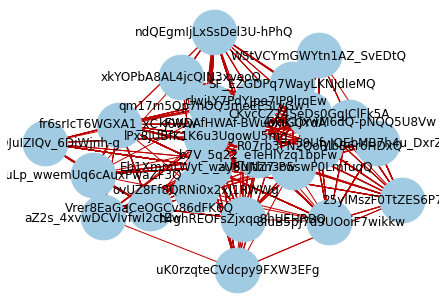

In [19]:
G = nx.MultiGraph()
G.add_nodes_from(diff)
G.add_edges_from(edges)
gra = generic_graph_view(G, create_using = None)
nx.draw(gra, node_color='#A0CBE2', edge_color='#BB0000', with_labels = True, node_size = 2000)


In [20]:
degree = nx.degree_centrality(G)
print('Degree Centrality is :\n', degree)
print('------')
print('Values of Degree centrality is :\n',degree.values())
print('------')
print('Sum of all the degree centrality values is:\n',sum(degree.values()))
print('------')
print('Total nodes of the graph is:\n',len(degree.values()))
print('------')
mean_degree_centrality = sum(degree.values()) / len(degree.values())
print('Average Degree Centrality is :\n', mean_degree_centrality)

Degree Centrality is :
 {'-8luB5pJ7d9UOoiF7wikkw': 2.625, 'CKvcCZ14SeDs0GgJClFk5A': 7.0, 'uLp_wwemUq6cAuxPwaZF3Q': 3.1666666666666665, 'b7V_5q22_eTeHlYzq1bpFw': 15.583333333333332, 'Eb1XmmLWyt_way5NNZ7-Pw': 14.375, 'clwjLY7PdYJpe7IP9lrqEw': 9.291666666666666, 'h4ghREOFsZjxqc8hUEHRBQ': 2.958333333333333, 'qm17m5Qp7nOQ3meEESLyGw': 10.75, 'xkYOPbA8AL4jcQIN3xveoQ': 5.875, '4vak1jxwM6dQ-pNQQ5U8Vw': 6.416666666666666, '_zU8uJthn3o5swP0LmfuqQ': 6.833333333333333, '39UfyJQEbMB7h4u_DxrZ3A': 3.875, '25ylMszF0TtZES6P7m6fvA': 1.9166666666666665, 'R07rb3FN2QoRIbB6r6HDxQ': 6.5, 'SF_EZGDPq7WayLKNJdIeMQ': 5.0, 'kFWDAfHWAf-BWuokIGOYdA': 6.625, 'Vrer8EaGaCeOGCv86dFK6Q': 3.7916666666666665, 'fr6srIcT6WGXA1_xC_J0Ww': 3.333333333333333, 'ovUZ8Ff8QRNi0x2xJ1RWWg': 3.0, 'ndQEgmIjLxSsDel3U-hPhQ': 2.833333333333333, 'lPx8jUBfK1K6u3UgowU5mg': 8.25, 'WStVCYmGWYtn1AZ_SvEDtQ': 2.833333333333333, 'uK0rzqteCVdcpy9FXW3EFg': 1.3333333333333333, 'dvG_QJuIZIQv_6DiWjnh-g': 1.6666666666666665, 'aZ2s_4xvwDCVIvfwI2ctEw': 2.2

**Repeating the experiment for a different metropolitian area for the same state (Louisiana)**

In [21]:
la_city_2 = df12_la[df12_la['city']=='Harvey']
la_city_2

,review_id,user_id,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
102817,_1rme3go3F96nwAexBZEGw,ZEpBNNP_btQrZ5qaByoZkg,LGqiubTmpJ-A1L5n7dmc6g,Domino's Pizza,"1525 Lapalco Blvd, # A",Harvey,LA,70058,29.875320,-90.045817,1.5,14,0,"{'RestaurantsGoodForGroups': 'False', 'Caters'...","Restaurants, Sandwiches, Pizza, Chicken Wings","{'Monday': '10:0-1:0', 'Tuesday': '10:0-1:0', ..."
102818,QOh3WfXYLx0VPB-NNJqFIQ,5hOzV9TZmoUy36rs1ni38A,LGqiubTmpJ-A1L5n7dmc6g,Domino's Pizza,"1525 Lapalco Blvd, # A",Harvey,LA,70058,29.875320,-90.045817,1.5,14,0,"{'RestaurantsGoodForGroups': 'False', 'Caters'...","Restaurants, Sandwiches, Pizza, Chicken Wings","{'Monday': '10:0-1:0', 'Tuesday': '10:0-1:0', ..."
102819,1BqEOPuZIBnFxYqgpvuGlw,CcdaMJuE3zuIijQXsUJJGw,LGqiubTmpJ-A1L5n7dmc6g,Domino's Pizza,"1525 Lapalco Blvd, # A",Harvey,LA,70058,29.875320,-90.045817,1.5,14,0,"{'RestaurantsGoodForGroups': 'False', 'Caters'...","Restaurants, Sandwiches, Pizza, Chicken Wings","{'Monday': '10:0-1:0', 'Tuesday': '10:0-1:0', ..."
102820,6b8bcspdCi8NjCn9utZGiw,cvnzZPAvX-YZVMPnkFkblA,LGqiubTmpJ-A1L5n7dmc6g,Domino's Pizza,"1525 Lapalco Blvd, # A",Harvey,LA,70058,29.875320,-90.045817,1.5,14,0,"{'RestaurantsGoodForGroups': 'False', 'Caters'...","Restaurants, Sandwiches, Pizza, Chicken Wings","{'Monday': '10:0-1:0', 'Tuesday': '10:0-1:0', ..."
102821,UGlWwtSNBmXtGlHcF00e5A,178lUNiULUgxi8fdm1zXmA,LGqiubTmpJ-A1L5n7dmc6g,Domino's Pizza,"1525 Lapalco Blvd, # A",Harvey,LA,70058,29.875320,-90.045817,1.5,14,0,"{'RestaurantsGoodForGroups': 'False', 'Caters'...","Restaurants, Sandwiches, Pizza, Chicken Wings","{'Monday': '10:0-1:0', 'Tuesday': '10:0-1:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6989308,och7JUpbEmybnlVBuCRk6w,_vO57SFd9-nLOeh71oxv5g,U2hFczPJq4HNWUejG1ScPQ,Taqueria & Golden Chinese,1308 Manhattan Blvd,Harvey,LA,70058,29.895522,-90.061647,4.0,16,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Chinese, Mexican, Asian Fusion, Restaurants, B...","{'Monday': '5:0-22:0', 'Tuesday': '5:0-22:0', ..."
6989309,OY4xOGwZRPTFXdTabVhvYg,J9TXwbJUFUENlmS0B4C36w,U2hFczPJq4HNWUejG1ScPQ,Taqueria & Golden Chinese,1308 Manhattan Blvd,Harvey,LA,70058,29.895522,-90.061647,4.0,16,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Chinese, Mexican, Asian Fusion, Restaurants, B...","{'Monday': '5:0-22:0', 'Tuesday': '5:0-22:0', ..."
6989310,X7b6BvEwp_aTEQEARGizyA,bWU312hiIv2x-3qlf3sIPA,U2hFczPJq4HNWUejG1ScPQ,Taqueria & Golden Chinese,1308 Manhattan Blvd,Harvey,LA,70058,29.895522,-90.061647,4.0,16,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Chinese, Mexican, Asian Fusion, Restaurants, B...","{'Monday': '5:0-22:0', 'Tuesday': '5:0-22:0', ..."
6989311,AI1DGwse6hwEG9LZQKWZoA,b5SFdRT2aQIBXMrdBwppsA,U2hFczPJq4HNWUejG1ScPQ,Taqueria & Golden Chinese,1308 Manhattan Blvd,Harvey,LA,70058,29.895522,-90.061647,4.0,16,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Chinese, Mexican, Asian Fusion, Restaurants, B...","{'Monday': '5:0-22:0', 'Tuesday': '5:0-22:0', ..."


In [22]:
grouping1=la_city_2.groupby('business_id')['review_count'].agg('mean').reset_index()
grouping1

,business_id,review_count
0,-halGT88LFZtC0Z-UXjJpw,13.0
1,0FyHyU7x-djPYRVKKczSfQ,26.0
2,0P5hJOCvtH40Bx9UFO0K5w,22.0
3,0StbKjld9f8GbeDRy0fS0A,36.0
4,0ZUPM643ZMhOoE7svE8NDg,262.0
...,...,...
284,zaCX8VFkfunbp3yH60Zg_Q,18.0
285,zbBny6UEyVqn5gIgbPAL3w,6.0
286,zpTCAJqu8f9T04paCzPrVw,12.0
287,zsi8oJBaY3UrMMmQm4DncA,11.0


In [23]:
la_city_2 = la_city_2.query('review_count > 130')
la_city_2

,review_id,user_id,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
1042501,0FKt4yMQBl0ryyKi3qAOkQ,cF5JyW6_oXZXjjxmtXNtPg,GtWSpGm3-si4ejOJu07dHg,Texas Roadhouse,1631 Westbank Expy,Harvey,LA,70058,29.903330,-90.068420,3.0,195,1,"{'WiFi': ""u'no'"", 'GoodForKids': 'True', 'Rest...","Steakhouses, Restaurants, American (Traditiona...","{'Monday': '0:0-0:0', 'Tuesday': '15:0-21:0', ..."
1042502,XTFToHWcKDBKHKWdmI1w-Q,9_lcpqJ53tPpo614CD1oRw,GtWSpGm3-si4ejOJu07dHg,Texas Roadhouse,1631 Westbank Expy,Harvey,LA,70058,29.903330,-90.068420,3.0,195,1,"{'WiFi': ""u'no'"", 'GoodForKids': 'True', 'Rest...","Steakhouses, Restaurants, American (Traditiona...","{'Monday': '0:0-0:0', 'Tuesday': '15:0-21:0', ..."
1042503,AFfyJ9CKavrR-oFQD9-TCQ,M8sZsNYNdvqS7NyVh5z_Pg,GtWSpGm3-si4ejOJu07dHg,Texas Roadhouse,1631 Westbank Expy,Harvey,LA,70058,29.903330,-90.068420,3.0,195,1,"{'WiFi': ""u'no'"", 'GoodForKids': 'True', 'Rest...","Steakhouses, Restaurants, American (Traditiona...","{'Monday': '0:0-0:0', 'Tuesday': '15:0-21:0', ..."
1042504,GNFTd20WrwGCMWnGktGScw,xRIdclor13VwQSvcRPDJ3g,GtWSpGm3-si4ejOJu07dHg,Texas Roadhouse,1631 Westbank Expy,Harvey,LA,70058,29.903330,-90.068420,3.0,195,1,"{'WiFi': ""u'no'"", 'GoodForKids': 'True', 'Rest...","Steakhouses, Restaurants, American (Traditiona...","{'Monday': '0:0-0:0', 'Tuesday': '15:0-21:0', ..."
1042505,6ELUQFKdiHUY8D5mxLzWbQ,TRyvlu7AQuZwI_TxzhKGGg,GtWSpGm3-si4ejOJu07dHg,Texas Roadhouse,1631 Westbank Expy,Harvey,LA,70058,29.903330,-90.068420,3.0,195,1,"{'WiFi': ""u'no'"", 'GoodForKids': 'True', 'Rest...","Steakhouses, Restaurants, American (Traditiona...","{'Monday': '0:0-0:0', 'Tuesday': '15:0-21:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5269373,kiB3ck4dEgd6NFwaBzQNhw,UzgBiZJwRlnW_iMkjugP_Q,0uaL1_jJOOnB51R3XIYrKw,Perino's Boiling Pot,3754 W Bank Expy,Harvey,LA,70058,29.895409,-90.088452,3.5,173,1,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Seafood, Food, Specialty Food, Restaurants, Se...","{'Monday': '11:0-21:0', 'Wednesday': '11:0-21:..."
5269374,BV3B6E-vRoWRL3BgHydO0Q,XHrOzVJoFl5JUdNlzcAqJA,0uaL1_jJOOnB51R3XIYrKw,Perino's Boiling Pot,3754 W Bank Expy,Harvey,LA,70058,29.895409,-90.088452,3.5,173,1,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Seafood, Food, Specialty Food, Restaurants, Se...","{'Monday': '11:0-21:0', 'Wednesday': '11:0-21:..."
5269375,oc_RKH1nnasq9xJiXpBTng,EP8o8JnQSI0WEkeodwA8lA,0uaL1_jJOOnB51R3XIYrKw,Perino's Boiling Pot,3754 W Bank Expy,Harvey,LA,70058,29.895409,-90.088452,3.5,173,1,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Seafood, Food, Specialty Food, Restaurants, Se...","{'Monday': '11:0-21:0', 'Wednesday': '11:0-21:..."
5269376,obTCJKWjnnXLXCXWM4J4Cw,GRSH4mFr1i52wqvnuvP4zA,0uaL1_jJOOnB51R3XIYrKw,Perino's Boiling Pot,3754 W Bank Expy,Harvey,LA,70058,29.895409,-90.088452,3.5,173,1,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Seafood, Food, Specialty Food, Restaurants, Se...","{'Monday': '11:0-21:0', 'Wednesday': '11:0-21:..."


In [24]:
la_city_2 = la_city_2.groupby(['business_id','user_id'], as_index = False).sum()
# groupby user_id and business_id and using a function to print the output

dataframe1 = la_city_2.drop(['latitude', 'longitude', 'stars', 'review_count', 'is_open'], axis = 1)
dataframe1

,business_id,user_id
0,0ZUPM643ZMhOoE7svE8NDg,-9bbOgdO8YCd4FzMm2Y5nA
1,0ZUPM643ZMhOoE7svE8NDg,-F7TSdsTA244F71mBVRioQ
2,0ZUPM643ZMhOoE7svE8NDg,-JH83VC8iODRWjZ-EeQO4A
3,0ZUPM643ZMhOoE7svE8NDg,00DHzrssX6SgJfWwbbytkw
4,0ZUPM643ZMhOoE7svE8NDg,07QlL7le2nJudYQ_vB6j5g
...,...,...
1681,bmq7tvQ3Qbmg9Jpw4E4VFQ,xBc2g_M9Nw8j39DJqNJshg
1682,bmq7tvQ3Qbmg9Jpw4E4VFQ,xq7PHKnOeDkeqirafNEVCA
1683,bmq7tvQ3Qbmg9Jpw4E4VFQ,ylnnYoSU053eUlMv5l4toQ
1684,bmq7tvQ3Qbmg9Jpw4E4VFQ,yp4HD68X9EuRiAfDLZ-wbg


In [25]:
a1 = dataframe1.business_id.unique()
b1 = dataframe1.user_id.unique()
print(a1.shape)
print(b1.shape)

(9,)
(1432,)


In [26]:
# create a new dataframe
df_new1 = pd.DataFrame()
# solving the required condition
# initializing two empty lists for nodes and edges
edges1 = []
nodes1 = []
for i in b:
    df_u1 = dataframe1.loc[dataframe1['user_id']==i]
    if len(df_u1) > 1:
        c = df_u1.business_id.tolist()
        df_new1 = df_new1.append(df_u1)
        d = len(c) - 1
        for j in range (d):
            for k in range (j, d):
                g = k+1
                e = (c[k], c[g])
                edges1.append(e)

In [27]:
df_new1

,business_id,user_id
133,0ZUPM643ZMhOoE7svE8NDg,T68PUOXE8kzjsDQbOYjjbg
1592,bmq7tvQ3Qbmg9Jpw4E4VFQ,T68PUOXE8kzjsDQbOYjjbg
165,0ZUPM643ZMhOoE7svE8NDg,ZERpGXwdvHjWApWRcVofSQ
1438,a-0vg8_ndXJ3GyAgL_OmQg,ZERpGXwdvHjWApWRcVofSQ
1618,bmq7tvQ3Qbmg9Jpw4E4VFQ,ZERpGXwdvHjWApWRcVofSQ
...,...,...
704,FAvEJQ0E7n4f_Wasg9UvEw,uLHTQMhW1gJGTSeoC07Rew
890,GtWSpGm3-si4ejOJu07dHg,uLHTQMhW1gJGTSeoC07Rew
1143,S6za38QmbFX9pAOK0E_yFA,uLHTQMhW1gJGTSeoC07Rew
1325,XbobIU5XuX4K52HrTvHknw,uLHTQMhW1gJGTSeoC07Rew


In [28]:
diff1 = list(df_new1.business_id.unique())
diff1

['0ZUPM643ZMhOoE7svE8NDg',
 'bmq7tvQ3Qbmg9Jpw4E4VFQ',
 'a-0vg8_ndXJ3GyAgL_OmQg',
 'FAvEJQ0E7n4f_Wasg9UvEw',
 'GtWSpGm3-si4ejOJu07dHg',
 '0uaL1_jJOOnB51R3XIYrKw',
 '4DGJbaaFuCPJ8L4YJCR29w',
 'XbobIU5XuX4K52HrTvHknw',
 'S6za38QmbFX9pAOK0E_yFA']

In [29]:
print('Total number of edges in the graph :',len(edges1)) # total list of s-t pairs of the graph
print('-----')
# the list will have the bussiness IDs in the s-t pairs
print('Total number of nodes in the graph will be:', len(diff1))

Total number of edges in the graph : 198
-----
Total number of nodes in the graph will be: 9


**D) Drawing the graph and computing the degree centrality of all vertices. 
Computing the average degree centrality of all nodes** 

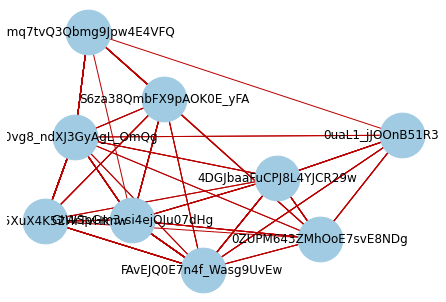

In [30]:
G1 = nx.MultiGraph()
G1.add_nodes_from(diff1)
G1.add_edges_from(edges1)
graph1 = generic_graph_view(G1, create_using = None)
nx.draw(graph1, node_color='#A0CBE2', edge_color='#BB0000', with_labels = True, node_size = 2000)

In [31]:
degree1 = nx.degree_centrality(G1)
print('Degree Centrality is\n', degree1)
print('------')
print('Values of Degree centrality is :\n',degree1.values())
print('------')
print('Sum of all the degree centrality values is:\n',sum(degree1.values()))
print('------')
print('Total nodes of the graph is:\n',len(degree1.values()))
print('------')
mean_degree_centrality1 = sum(degree1.values()) / len(degree1.values())
print('Average Degree Centrality is :\n', mean_degree_centrality1)
print('------')

Degree Centrality is
 {'0ZUPM643ZMhOoE7svE8NDg': 3.125, 'bmq7tvQ3Qbmg9Jpw4E4VFQ': 4.0, 'a-0vg8_ndXJ3GyAgL_OmQg': 9.25, 'FAvEJQ0E7n4f_Wasg9UvEw': 6.0, 'GtWSpGm3-si4ejOJu07dHg': 8.75, '0uaL1_jJOOnB51R3XIYrKw': 2.125, '4DGJbaaFuCPJ8L4YJCR29w': 4.0, 'XbobIU5XuX4K52HrTvHknw': 8.625, 'S6za38QmbFX9pAOK0E_yFA': 3.625}
------
Values of Degree centrality is :
 dict_values([3.125, 4.0, 9.25, 6.0, 8.75, 2.125, 4.0, 8.625, 3.625])
------
Sum of all the degree centrality values is:
 49.5
------
Total nodes of the graph is:
 9
------
Average Degree Centrality is :
 5.5
------
